In [1]:
import pandas as pd
from datetime import datetime
import time
import numpy as np
import re
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

C:\Python\Anaconda3-52\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df_train = pd.read_csv('./team_project_2/basic_dataset/bike/train.csv',parse_dates=["datetime"],encoding = 'utf-8')
df_train.shape

(10886, 12)

In [3]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# df_train.columns
# df_train.info()

In [5]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
# 모든 feature값의 상관계수 알기 : 별... 상관 없다.... 
df_train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('tab20c'), axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.0,0.029,-0.0081,0.0089,0.26,0.26,0.19,-0.15,0.097,0.16,0.16
holiday,0.029,1.0,-0.25,-0.0071,0.00029,-0.0052,0.0019,0.0084,0.044,-0.021,-0.0054
workingday,-0.0081,-0.25,1.0,0.034,0.03,0.025,-0.011,0.013,-0.32,0.12,0.012
weather,0.0089,-0.0071,0.034,1.0,-0.055,-0.055,0.41,0.0073,-0.14,-0.11,-0.13
temp,0.26,0.00029,0.03,-0.055,1.0,0.98,-0.065,-0.018,0.47,0.32,0.39
atemp,0.26,-0.0052,0.025,-0.055,0.98,1.0,-0.044,-0.057,0.46,0.31,0.39
humidity,0.19,0.0019,-0.011,0.41,-0.065,-0.044,1.0,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.0084,0.013,0.0073,-0.018,-0.057,-0.32,1.0,0.092,0.091,0.1
casual,0.097,0.044,-0.32,-0.14,0.47,0.46,-0.35,0.092,1.0,0.5,0.69
registered,0.16,-0.021,0.12,-0.11,0.32,0.31,-0.27,0.091,0.5,1.0,0.97


## datetime 피쳐값을 년,월,시간으로 뽀개기

In [7]:
# 듀란듀란! 날짜 뽀개기
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second
df_train.shape

(10886, 18)

In [8]:
# df_train.head(20)

## 피쳐값 조정을 위해 모든 변수 *시.각.화* 하자구욧!!!

[Text(0.5,0,'hour'), Text(0.5,1,'시간별 대여량')]

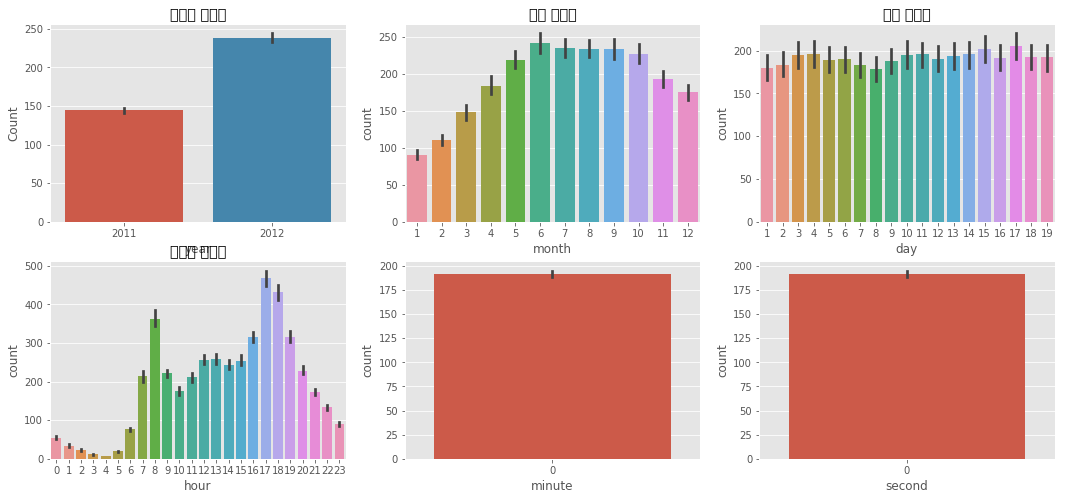

In [9]:
import seaborn as sns
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df_train, x="year", y="count", ax=ax1)
sns.barplot(data=df_train, x="month", y="count", ax=ax2)
sns.barplot(data=df_train, x="day", y="count", ax=ax3)
sns.barplot(data=df_train, x="hour", y="count", ax=ax4)
sns.barplot(data=df_train, x="minute", y="count", ax=ax5)
sns.barplot(data=df_train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

## 자! 이제 풍속 0인거 조지자규 듀란

In [10]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다듀란
trainWind0 = df_train.loc[df_train['windspeed'] == 0]
trainWindNot0 = df_train.loc[df_train['windspeed'] != 0]

In [11]:
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0,8,6,14,2011,1,1,9,0,0
64,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,0.0,8,102,110,2011,1,3,19,0,0


In [12]:
del trainWind0['windspeed']

In [13]:
trainWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'casual', 'registered', 'count', 'year', 'month',
       'day', 'hour', 'minute', 'second'],
      dtype='object')

In [14]:
wind=np.random.normal(trainWindNot0['windspeed'].mean(), 1, 1313)
df_wind=pd.DataFrame(wind)
df_wind=df_wind.rename(columns={0:'windspeed'})
df_wind.head()
# df_wind

,windspeed
0,16.343437
1,15.322073
2,13.065399
3,15.310987
4,14.687388


In [15]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [16]:
trainWind0 = trainWind0.reset_index(drop=True)
trainWind0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,1,1,2011,1,1,4,0,0


In [17]:
test = pd.concat([trainWind0,df_wind],axis = 1)
test.head()
# del test['windspeed']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,day,hour,minute,second,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,3,13,16,2011,1,1,0,0,0,16.343437
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,8,32,40,2011,1,1,1,0,0,15.322073
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,5,27,32,2011,1,1,2,0,0,13.065399
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,3,10,13,2011,1,1,3,0,0,15.310987
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,1,1,2011,1,1,4,0,0,14.687388


In [18]:
test.columns
test[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month',
       'day', 'hour', 'minute', 'second']]
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,day,hour,minute,second,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,3,13,16,2011,1,1,0,0,0,16.343437
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,8,32,40,2011,1,1,1,0,0,15.322073
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,5,27,32,2011,1,1,2,0,0,13.065399
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,3,10,13,2011,1,1,3,0,0,15.310987
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,1,1,2011,1,1,4,0,0,14.687388


In [19]:
trainWindNot0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [20]:
test2 = pd.concat([test, trainWindNot0], axis=0)

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [21]:
test2.head()

,atemp,casual,count,datetime,day,holiday,hour,humidity,minute,month,registered,season,second,temp,weather,windspeed,workingday,year
0,14.395,3,16,2011-01-01 00:00:00,1,0,0,81,0,1,13,1,0,9.84,1,16.343437,0,2011
1,13.635,8,40,2011-01-01 01:00:00,1,0,1,80,0,1,32,1,0,9.02,1,15.322073,0,2011
2,13.635,5,32,2011-01-01 02:00:00,1,0,2,80,0,1,27,1,0,9.02,1,13.065399,0,2011
3,14.395,3,13,2011-01-01 03:00:00,1,0,3,75,0,1,10,1,0,9.84,1,15.310987,0,2011
4,14.395,0,1,2011-01-01 04:00:00,1,0,4,75,0,1,1,1,0,9.84,1,14.687388,0,2011


In [22]:
test2=test2[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'year', 'month',
       'day', 'hour','casual', 'registered', 'count']]
test2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,casual,registered,count
0,1,0,0,1,9.84,14.395,81,16.343437,2011,1,1,0,3,13,16
1,1,0,0,1,9.02,13.635,80,15.322073,2011,1,1,1,8,32,40
2,1,0,0,1,9.02,13.635,80,13.065399,2011,1,1,2,5,27,32
3,1,0,0,1,9.84,14.395,75,15.310987,2011,1,1,3,3,10,13
4,1,0,0,1,9.84,14.395,75,14.687388,2011,1,1,4,0,1,1
5,1,0,0,1,9.02,13.635,80,16.896712,2011,1,1,6,2,0,2
6,1,0,0,1,8.20,12.880,86,13.824639,2011,1,1,7,1,2,3
7,1,0,0,1,9.84,14.395,75,12.886615,2011,1,1,8,1,7,8
8,1,0,0,1,13.12,17.425,76,14.855393,2011,1,1,9,8,6,14
9,1,0,1,1,8.20,12.880,47,15.061182,2011,1,3,19,8,102,110


In [23]:
import math
from sklearn import preprocessing

# 특정 변수에만 함수 적용
test2['count_log'] = preprocessing.scale(np.log(test2['count']+1))

In [24]:
test2['temp'] =test2['temp'] / test2['temp'].max()
test2['temp']

test2['humidity'] =test2['humidity'] / test2['humidity'].max()
test2['humidity']

test2['windspeed'] =test2['windspeed'] / test2['windspeed'].max()
test2['windspeed']

test2['atemp'] =test2['atemp'] / test2['atemp'].max()
test2['atemp']

test2['casual'] =test2['casual'] / test2['casual'].max()
test2['casual']

test2['registered'] =test2['registered'] / test2['registered'].max()
test2['registered']

test2['year'] =test2['year'] / test2['year'].max()
test2['year']


test2.head(10)
# X = X / X.max()
# X = X - X.mean(axis=1).reshape(len(X), 1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,casual,registered,count,count_log
0,1,0,0,1,0.24,0.316687,0.81,0.286743,0.999503,1,1,0,0.008174,0.014673,16,-1.238667
1,1,0,0,1,0.22,0.299967,0.80,0.268823,0.999503,1,1,1,0.021798,0.036117,40,-0.618429
2,1,0,0,1,0.22,0.299967,0.80,0.229230,0.999503,1,1,2,0.013624,0.030474,32,-0.771357
3,1,0,0,1,0.24,0.316687,0.75,0.268628,0.999503,1,1,3,0.008174,0.011287,13,-1.375455
4,1,0,0,1,0.24,0.316687,0.75,0.257687,0.999503,1,1,4,0.000000,0.001129,1,-2.746405
5,1,0,0,1,0.22,0.299967,0.80,0.296450,0.999503,1,1,6,0.005450,0.000000,2,-2.460743
6,1,0,0,1,0.20,0.283357,0.86,0.242551,0.999503,1,1,7,0.002725,0.002257,3,-2.258063
7,1,0,0,1,0.24,0.316687,0.75,0.226093,0.999503,1,1,8,0.002725,0.007901,8,-1.686739
8,1,0,0,1,0.32,0.383346,0.76,0.260635,0.999503,1,1,9,0.021798,0.006772,14,-1.326848
9,1,0,1,1,0.20,0.283357,0.47,0.264246,0.999503,1,3,19,0.021798,0.115124,110,0.083252


In [25]:
# for i in range(len(test3['year'])):
#     if test3['year'][i] == 2011:
#         test3['year'][i] = 0
#     else:
#         test3['year'][i] = 1
# test3['year'][0]
# test3['year'].value_counts()

# test2['year'].value_counts()
# test3=test2.drop(columns =['year'])
#  df.drop(columns=['B', 'C'])
# test3.to_csv('./data/test3_bike.csv',encoding = 'utf-8')

In [26]:
test2.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,casual,registered,count,count_log
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,1.088600e+04
mean,2.506614,0.028569,0.680875,1.418427,0.493436,0.520407,0.618865,0.255410,0.999752,6.521495,9.992559,11.541613,0.098152,0.175567,191.574132,1.709711e-16
std,1.116174,0.166599,0.466159,0.633839,0.190039,0.186439,0.192450,0.116780,0.000249,3.444373,5.476608,6.915838,0.136132,0.170473,181.144454,1.000046e+00
min,1.000000,0.000000,0.000000,1.000000,0.020000,0.016720,0.000000,0.105325,0.999503,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-2.746405e+00
25%,2.000000,0.000000,0.000000,1.000000,0.340000,0.366626,0.470000,0.157870,0.999503,4.000000,5.000000,6.000000,0.010899,0.040632,42.000000,-5.848739e-01
50%,3.000000,0.000000,1.000000,1.000000,0.500000,0.533275,0.620000,0.243248,1.000000,7.000000,10.000000,12.000000,0.046322,0.133183,145.000000,2.763463e-01
75%,4.000000,0.000000,1.000000,2.000000,0.640000,0.683313,0.770000,0.298225,1.000000,10.000000,15.000000,18.000000,0.133515,0.250564,284.000000,7.475932e-01
max,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,19.000000,23.000000,1.000000,1.000000,977.000000,1.616291e+00


In [27]:
# test2['year'].unique()

# for i in range(len(test2)):
#     if str(test2['year'][i]) == '2011':
#         test2['year'][i] = '0'
#     else:
#         test2['year'][i] = '1'

In [28]:
test2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'casual',
       'registered', 'count', 'count_log'],
      dtype='object')

In [29]:
test2[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'casual',
       'registered', 'count_log', 'count']]
test2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,casual,registered,count,count_log
0,1,0,0,1,0.24,0.316687,0.81,0.286743,0.999503,1,1,0,0.008174,0.014673,16,-1.238667
1,1,0,0,1,0.22,0.299967,0.80,0.268823,0.999503,1,1,1,0.021798,0.036117,40,-0.618429
2,1,0,0,1,0.22,0.299967,0.80,0.229230,0.999503,1,1,2,0.013624,0.030474,32,-0.771357
3,1,0,0,1,0.24,0.316687,0.75,0.268628,0.999503,1,1,3,0.008174,0.011287,13,-1.375455
4,1,0,0,1,0.24,0.316687,0.75,0.257687,0.999503,1,1,4,0.000000,0.001129,1,-2.746405


In [30]:
test2.to_csv('./team_project_2/basic_dataset/bike/test2_bike_pluscountlog.csv', sep=',', encoding='utf-8')

In [31]:
from tqdm import tqdm_notebook
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [32]:
# def xavier_init(n_inputs, n_outputs, uniform=True):
#     if uniform:
#         # 6 was used in the paper.
#         init_range = tf.sqrt(6.0 / (n_inputs + n_outputs))
#         return tf.random_uniform_initializer(-init_range, init_range)
#     else:
#         # 3 gives us approximately the same limints as above since this repicks
#         # values greater than 2 standard deviations from the mean.
#         stddev = tf.sqrt(3.0 / (n_inputs + n_outputs))
#         return tf.truncated_normal_initializer(stddev=stddev)

In [33]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

# np.loadtxt('./data/test2_bike.csv', delimiter=',', dtype=np.float32)
xy = np.loadtxt('./team_project_2/basic_dataset/bike/test2_bike_pluscountlog.csv', delimiter=',', skiprows=1, dtype=np.int32)
x_data = xy[:, 1:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 15])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([15, 128]), name='weight')
b1 = tf.Variable(tf.random_normal([128]), name='bias')
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([128, 128]), name='weight2')
b2 = tf.Variable(tf.random_normal([128]), name='bias2')
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W2 = tf.Variable(tf.random_normal([128, 1]))
b2 = tf.Variable(tf.random_normal([1]))

# Hypothesis
hypothesis = tf.matmul(L1, W2) + b2

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

x_data.shape : (10886, 15), 	len(x_data) : 10886 
x_data : 
[[  1   0   0 ...   0   0  16]
 [  1   0   0 ...   0   0  40]
 [  1   0   0 ...   0   0  32]
 ...
 [  4   0   1 ...   0   0 168]
 [  4   0   1 ...   0   0 129]
 [  4   0   1 ...   0   0  88]]
-------------------------
y_data.shape : (10886, 1)  
y_data : 
[[-1]
 [ 0]
 [ 0]
 ...
 [ 0]
 [ 0]
 [ 0]]
Instructions for updating:
Use `argmax` instead


In [35]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(201)):
        cost_val, hy_val, t_val = sess.run(
            [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Prediction : \n{}".format(step, cost_val, hy_val))
            print("Step : {} \tCost : {} ".format(step, cost_val))
            
    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_data}))



 Step : 0 
 Cost : 11565572.0 
 Prediction : 
None
Step : 0 	Cost : 11565572.0 

 Step : 20 
 Cost : 375.61346435546875 
 Prediction : 
None
Step : 20 	Cost : 375.61346435546875 

 Step : 40 
 Cost : 356.50604248046875 
 Prediction : 
None
Step : 40 	Cost : 356.50604248046875 

 Step : 60 
 Cost : 340.3932800292969 
 Prediction : 
None
Step : 60 	Cost : 340.3932800292969 

 Step : 80 
 Cost : 326.65972900390625 
 Prediction : 
None
Step : 80 	Cost : 326.65972900390625 

 Step : 100 
 Cost : 314.8226013183594 
 Prediction : 
None
Step : 100 	Cost : 314.8226013183594 

 Step : 120 
 Cost : 304.5318603515625 
 Prediction : 
None
Step : 120 	Cost : 304.5318603515625 

 Step : 140 
 Cost : 295.4547424316406 
 Prediction : 
None
Step : 140 	Cost : 295.4547424316406 

 Step : 160 
 Cost : 287.41754150390625 
 Prediction : 
None
Step : 160 	Cost : 287.41754150390625 

 Step : 180 
 Cost : 280.3056335449219 
 Prediction : 
None
Step : 180 	Cost : 280.3056335449219 

 Step : 200 
 Cost : 273.94

NameError: name 'x_test' is not defined